In [1]:
%%capture
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from transformers import Trainer, TrainingArguments
from datasets import load_dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from transformers import AutoImageProcessor, ConvNextV2ForImageClassification
import torch
from datasets import load_dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from transformers import EfficientNetImageProcessor, EfficientNetForImageClassification
from PIL import Image

2024-07-01 15:36:50.102068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 15:36:50.102122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 15:36:50.103592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
dataset_path = r"/kaggle/input/dataset-c-n-siddhi/Dataset_SIDDHI"

# class CropAndTransform:
#     def __init__(self, crop_box, transform):
#         self.crop_box = crop_box
#         self.transform = transform

#     def __call__(self, image):
#         image = image.crop(self.crop_box)
#         return self.transform(image)

# # Transformation pipeline
# crop_box = (450, 350, 1400, 1200)  # (left, upper, right, lower) to crop to 1360 x 850
# transform = transforms.Compose([
#     CropAndTransform(crop_box, transforms.Resize((224, 224))),
#     transforms.ToTensor(),
# ])

# dataset = ImageFolder(root=dataset_path, transform=transform)

# # Retrieve class labels
# class_labels = dataset.classes

# # Print the class labels
# print("Class Labels:")
# print(class_labels)
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [ ]:
model_name = "facebook/convnextv2-tiny-22k-384"
# processor = EfficientNetImageProcessor.from_pretrained(model_name)
model1 = ConvNextV2ForImageClassification.from_pretrained(model_name)

In [ ]:
# for param in model.parameters():
#     param.requires_grad = False

# in_features = model.classifier.in_features
# model.classifier = torch.nn.Sequential(
#     torch.nn.Linear(in_features, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(512, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(256, 1)  
# )

In [5]:
from transformers import DefaultDataCollator

# data_collator = DefaultDataCollator()

In [ ]:
# training_args = TrainingArguments(
#     output_dir='./results',
#     evaluation_strategy='epoch',
#     learning_rate=1e-3,
#     per_device_train_batch_size=32,
#     per_device_eval_batch_size=32,
#     num_train_epochs=20,
#     weight_decay=0.01,
#     save_total_limit=2,
#     load_best_model_at_end=True,
#     metric_for_best_model="accuracy",
#     save_strategy='epoch',  # Align with evaluation strategy
#     push_to_hub=False,  # Disable wandb logging
#     report_to='none'
# )

# # Define a compute metrics function
# def compute_metrics(eval_pred):
#     logits, labels = eval_pred.predictions, eval_pred.label_ids
#     predictions = torch.argmax(logits, dim=-1)
#     accuracy = (predictions == labels).sum().item() / len(labels)
#     return {'accuracy': accuracy}

# # Initialize the Trainer
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     tokenizer=processor,
#     compute_metrics=compute_metrics,
#     data_collator=data_collator
# )

# # Start training
# trainer.train()

# # Save the final model
# trainer.save_model("final_model")
# print("Final model saved")

In [ ]:
# from transformers.data.data_collator import default_data_collator

# def custom_collator(features):
#     print(type(features))
#     print(features)
#     return default_data_collator(features)

# # Assuming you're using a Trainer from the HuggingFace library
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     data_collator=custom_collator  # Use the custom collator here
# )

# trainer.train()

In [6]:
dataset = load_dataset("imagefolder", data_dir="/kaggle/input/dataset-c-n-siddhi/Dataset_SIDDHI")

Resolving data files:   0%|          | 0/8994 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
from datasets import load_metric

metric = load_metric("accuracy")

/tmp/ipykernel_486/1780215247.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/opt/conda/lib/python3.10/site-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 8994
    })
})

In [9]:
example = dataset["train"][10]
example

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=2048x1536>,
 'label': 0}

In [10]:
dataset["train"].features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['CATARACT', 'NORMAL'], id=None)}

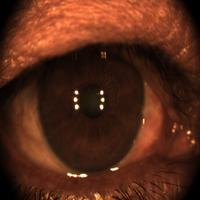

In [11]:
example['image'].resize((200, 200))

In [12]:
example['label']

0

In [13]:
dataset["train"].features["label"].names

['CATARACT', 'NORMAL']

In [14]:
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[1]

'NORMAL'

In [15]:
from transformers import AutoImageProcessor

preprocessor = AutoImageProcessor.from_pretrained("facebook/convnextv2-large-22k-384")

In [16]:
preprocessor

ConvNextImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "crop_pct",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 384
  }
}

In [17]:
crop_box = (450, 350, 1400, 1200)
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

# Assuming you have image_processor object that provides the necessary size and normalization parameters
normalize = Normalize(mean=preprocessor.image_mean, std=preprocessor.image_std)

# Define the crop size based on the provided crop_box
crop_size = (crop_box[3] - crop_box[1], crop_box[2] - crop_box[0])  # (height, width)

train_transforms = Compose(
    [
        CenterCrop(crop_size),  # Center crop to the desired size
        Resize((384, 384)),     # Resize to the target size
        RandomHorizontalFlip(), # Apply random horizontal flip
        ToTensor(),             # Convert image to tensor
        normalize,              # Normalize the tensor
    ]
)
def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch


In [18]:
splits = dataset["train"].train_test_split(test_size=0.2)
train_ds = splits['train']
val_ds = splits['test']

In [19]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_train)

In [20]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    "facebook/convnextv2-large-22k-384", 
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
for param in model.parameters():
    param.requires_grad = False

# Replace or add new layers
# Example: Replace classifier with a new one suitable for binary classification
in_features = model.classifier.in_features
# Example: Adding additional fully connected layers
model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 2)  # Output layer for binary classification
)

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of ConvNextV2ForImageClassification were not initialized from the model checkpoint at facebook/convnextv2-large-22k-384 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1536]) in the checkpoint and torch.Size([2, 1536]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
%%capture
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [27]:
args = TrainingArguments(
    remove_unused_columns=False,
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="steps",      
    logging_steps=10,
    learning_rate=1e-3,
    per_device_train_batch_size=8,  # Reduced batch size
    gradient_accumulation_steps=4,
    eval_accumulation_steps=2,
    per_device_eval_batch_size=8,  # Reduced batch size
    num_train_epochs=3,
    dataloader_num_workers=4,
    warmup_ratio=0.1,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
    report_to='none',
    fp16=True,  # Enable mixed precision training
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [29]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [30]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=preprocessor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [31]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.590900,0.570374,0.713730
2,0.560600,0.559086,0.717621
3,0.527600,0.538253,0.724291


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_

***** train metrics *****
  epoch                    =           3.0
  total_flos               = 10529293628GF
  train_loss               =          0.59
  train_runtime            =    0:24:22.92
  train_samples_per_second =        14.755
  train_steps_per_second   =         0.461
